In [56]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import torch
plt.rcParams['font.sans-serif'] = ['SimHei']#绘图显示中文
plt.rc('font',family='Times New Roman')

In [57]:
df = pd.read_csv(r"C:\Users\13522\Desktop\code_bishe\yanzheng\data\output.csv")
df.columns=['islocal','direct','isserver','duration','framesizeration_in','framesizeratio_out','localdelayavg','localdelaynavg',
            'remotedelayavg','remotedelaynavg','dupack','retrans','malf','outoforder','localdelay_label','remotedelay_label','dupack_label',
           'retrans_label','malf_label','outoforder_label']

In [58]:
df_filled = df.fillna(0)

In [59]:
df_filled.columns

Index(['islocal', 'direct', 'isserver', 'duration', 'framesizeration_in',
       'framesizeratio_out', 'localdelayavg', 'localdelaynavg',
       'remotedelayavg', 'remotedelaynavg', 'dupack', 'retrans', 'malf',
       'outoforder', 'localdelay_label', 'remotedelay_label', 'dupack_label',
       'retrans_label', 'malf_label', 'outoforder_label'],
      dtype='object')

In [60]:
feature_column=df_filled.columns[:14]
# 这里下面对数据的处理能被raw_feature迁移识别吗？
raw_feature=df_filled[feature_column]
localdelay_y=df_filled['localdelay_label']
remotedelay_y=df_filled['remotedelay_label']
dupack_y=df_filled['dupack_label']
retrans_y=df_filled['retrans_label']
malf_y=df_filled['malf_label']
outoforder_y=df_filled['outoforder_label']

In [61]:
# raw_feature=df.drop(['label'],axis=1)
# y=df['label']

标准化


In [62]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# 创建一个StandardScaler对象
scaler = StandardScaler()

# 使用fit_transform方法对数据进行标准化
scaled_feature = scaler.fit_transform(raw_feature.iloc[:,[3,4,5,6,7,8,9,10,11,12,13]])


In [63]:
raw_feature.columns

Index(['islocal', 'direct', 'isserver', 'duration', 'framesizeration_in',
       'framesizeratio_out', 'localdelayavg', 'localdelaynavg',
       'remotedelayavg', 'remotedelaynavg', 'dupack', 'retrans', 'malf',
       'outoforder'],
      dtype='object')

In [64]:
df_scale=df_filled
df_scale

,islocal,direct,isserver,duration,framesizeration_in,framesizeratio_out,localdelayavg,localdelaynavg,remotedelayavg,remotedelaynavg,dupack,retrans,malf,outoforder,localdelay_label,remotedelay_label,dupack_label,retrans_label,malf_label,outoforder_label
0,1,1,0,2.3652,0.168,0.012,0.012,0.089,0.151,0.151,0.019,0.037,0.0,0.470,0,0,0,0,0,1
1,1,1,0,1.9010,0.168,0.083,0.083,0.145,0.162,0.152,0.000,0.000,0.0,0.018,0,0,0,0,0,0
2,1,1,0,1.6903,0.007,0.000,0.000,0.000,0.330,0.330,0.000,0.000,0.0,0.000,0,0,0,0,0,0
3,1,1,0,1.9215,0.007,0.003,0.003,0.015,0.151,0.152,0.000,0.000,0.0,0.000,0,0,0,0,0,0
4,1,1,0,1.4449,0.007,0.000,0.000,0.000,0.152,0.154,0.000,0.000,0.0,0.000,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2967,1,1,0,1.6024,0.007,0.004,0.004,0.009,0.153,0.154,0.000,0.000,0.0,0.000,0,0,0,0,0,0
2968,1,1,0,1.4453,0.007,0.003,0.003,0.019,0.153,0.154,0.000,0.000,0.0,0.000,0,0,0,0,0,0
2969,1,1,0,1.5200,0.007,0.005,0.005,0.028,0.245,0.246,0.000,0.000,0.0,0.000,0,0,0,0,0,0
2970,1,1,0,1.2561,0.169,0.000,0.000,0.000,0.236,0.236,0.000,0.000,0.0,0.000,0,0,0,0,0,0


In [65]:
df_scale.iloc[:,[3,4,5,6,7,8,9,10,11,12,13]]=scaled_feature

In [66]:
df_scale

,islocal,direct,isserver,duration,framesizeration_in,framesizeratio_out,localdelayavg,localdelaynavg,remotedelayavg,remotedelaynavg,dupack,retrans,malf,outoforder,localdelay_label,remotedelay_label,dupack_label,retrans_label,malf_label,outoforder_label
0,1,1,0,1.028410,0.933209,-0.183474,-0.183474,1.374808,-0.694761,-0.363768,-0.017956,0.038491,-0.169048,5.164113,0,0,0,0,0,1
1,1,1,0,0.285540,0.933209,1.009195,1.009195,2.703843,-0.545343,-0.352229,-0.498717,-0.540447,-0.169048,-0.297735,0,0,0,0,0,0
2,1,1,0,-0.051648,-1.098269,-0.385052,-0.385052,-0.737409,1.736672,1.701724,-0.498717,-0.540447,-0.169048,-0.515242,0,0,0,0,0,0
3,1,1,0,0.318347,-1.098269,-0.334657,-0.334657,-0.381417,-0.694761,-0.352229,-0.498717,-0.540447,-0.169048,-0.515242,0,0,0,0,0,0
4,1,1,0,-0.444367,-1.098269,-0.385052,-0.385052,-0.737409,-0.681178,-0.329150,-0.498717,-0.540447,-0.169048,-0.515242,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2967,1,1,0,-0.192317,-1.098269,-0.317859,-0.317859,-0.523814,-0.667594,-0.329150,-0.498717,-0.540447,-0.169048,-0.515242,0,0,0,0,0,0
2968,1,1,0,-0.443727,-1.098269,-0.334657,-0.334657,-0.286486,-0.667594,-0.329150,-0.498717,-0.540447,-0.169048,-0.515242,0,0,0,0,0,0
2969,1,1,0,-0.324183,-1.098269,-0.301061,-0.301061,-0.072891,0.582081,0.732443,-0.498717,-0.540447,-0.169048,-0.515242,0,0,0,0,0,0
2970,1,1,0,-0.746509,0.945827,-0.385052,-0.385052,-0.737409,0.459830,0.617052,-0.498717,-0.540447,-0.169048,-0.515242,0,0,0,0,0,0


#### loacaldelay

In [67]:
import numpy as np

def split_time_series(data, window_size, step_size):
    """
    将时间序列数据切分为较短的窗口。
    
    参数:
        data: 时间序列数据，形状为 (M, N)，M 是时间点数量，N 是特征数量。
        window_size: 每个窗口的大小（时间点数量）。
        step_size: 窗口之间的步长（时间点数量）。
        
    返回:
        切分后的数据，形状为 (num_windows, window_size, N)。
    """
    M, N = data.shape
    num_windows = (M - window_size) // step_size + 1
    windows = np.empty((num_windows, window_size, N-1))
    labels=[]
    
    for i in range(num_windows):
        start_idx = i * step_size
        end_idx = start_idx + window_size
        windows[i] = data[start_idx:end_idx,:-1]

        labels.append( data[end_idx-1,-1])
        
    return windows,np.array(labels)

window_size = 128  # 每个窗口包含20个时间点
step_size =32 # 窗口之间的步长为32个时间点
# localdelay
raw_local = df_scale.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19]]
features,labels = split_time_series(raw_local.values, window_size, step_size)


In [68]:
cnn_lstm_att_features=torch.tensor(features, dtype=torch.float)
cnn_lstm_att_labels=torch.tensor(labels, dtype=torch.float)

In [69]:
cnn_lstm_att_labels.shape

torch.Size([89])

# 划分数据集

In [70]:
from torch.utils.data import TensorDataset, random_split  # 导入PyTorch的数据集和数据划分函数
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

class TimeSeriesDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]
    
    
dataset = TimeSeriesDataset(cnn_lstm_att_features, cnn_lstm_att_labels)

# 定义数据集的大小比例
train_ratio = 0.05
valid_ratio = 0.1
test_ratio = 0.85

# 计算训练集、验证集和测试集的大小
total_size = len(dataset)  # 总数据量大小
train_size = int(total_size * train_ratio)  # 训练集大小
valid_size = int(total_size * valid_ratio)  # 验证集大小
test_size = total_size - train_size - valid_size  # 测试集大小

# 随机划分数据集
train_dataset, valid_dataset, test_dataset = random_split(dataset, [train_size, valid_size, test_size])

In [71]:
##################################################################
##########################多头注意力机制##########################
##################################################################
class MultiHeadAttention(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.multihead_attn = nn.MultiheadAttention(embed_dim=embed_dim, num_heads=num_heads)

    def forward(self, x):
        # 注意: nn.MultiheadAttention的输入形状是 (seq_len, batch_size, embed_dim)
        x = x.permute(1, 0, 2)  # 转置为合适的输入形状
        attn_output, attn_output_weights = self.multihead_attn(x, x, x)
        attn_output = attn_output.permute(1, 0, 2)  # 再次转置回 (batch_size, seq_len, embed_dim)

        return attn_output, attn_output_weights

##################################################################
##########################CNN-LSTM-ATT##########################
##################################################################
class CNNLSTMAttentionModel(nn.Module):
    def __init__(self, batch_size, input_dim, output_dim, conv_archs, hidden_layer_sizes, num_heads=2):
        super().__init__()
        self.batch_size = batch_size
        self.output_dim = output_dim
        self.conv_arch = conv_archs
        self.input_channels = input_dim
        self.cnn_features = self.make_layers()

        self.num_layers = len(hidden_layer_sizes)
        self.lstm_layers = nn.ModuleList()
        self.lstm_layers.append(nn.LSTM(conv_archs[-1][-1], hidden_layer_sizes[0], batch_first=True))
        for i in range(1, self.num_layers):
            self.lstm_layers.append(nn.LSTM(hidden_layer_sizes[i-1], hidden_layer_sizes[i], batch_first=True))

        self.attention = MultiHeadAttention(hidden_layer_sizes[-1], num_heads)  # 使用多头注意力

        self.linear = nn.Linear(hidden_layer_sizes[-1], output_dim)
        
      # CNN卷积池化结构
    def make_layers(self):
        layers = []
        for (num_convs, out_channels) in self.conv_arch:
            for _ in range(num_convs):
                layers.append(nn.Conv1d(self.input_channels, out_channels, kernel_size=3, padding=1))
                layers.append(nn.ReLU(inplace=True))
                self.input_channels = out_channels
            layers.append(nn.MaxPool1d(kernel_size=2, stride=2))
        return nn.Sequential(*layers)

    def forward(self, input_seq):
        # CNN 卷积池化
        # CNN 网络输入[batch,H_in, seq_length]
        # 调换维度[B, L, D] --> [B, D, L]
        input_seq = input_seq.permute(0,2,1)
        cnn_features = self.cnn_features(input_seq) # torch.Size([256, 6, 256])
        # print(cnn_features.size())
#         print(cnn_features.shape)
        # 送入 LSTM 层
        #改变输入形状，lstm 适应网络输入[batch, seq_length, H_in]
        lstm_out = cnn_features.permute(0, 2, 1)
        for lstm in self.lstm_layers:
            lstm_out, _= lstm(lstm_out)  ## 进行一次LSTM层的前向传播  
            
        attention_out, attention_weights = self.attention(lstm_out)  #  attention
        attention_out = attention_out.mean(dim=1)  # mean
#         print(attention_out.shape)
        predict = self.linear(attention_out)

        return predict


In [72]:
import torch
import torch.nn as nn
def calculate_accuracy(labels,outputs):
    """
    计算准确率。
    outputs: 模型输出，形状为 (batch_size, num_classes)。
    labels: 真实标签，形状为 (batch_size,)。
    """
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == labels).sum().item()
    accuracy = correct / labels.size(0)
    return accuracy

def calculate_f1_score(labels,outputs):
    """
    计算F1分数。
    outputs: 模型输出，形状为 (batch_size, num_classes)。
    labels: 真实标签，形状为 (batch_size,)。
    """
    _, predicted = torch.max(outputs, 1)
    
    # 计算TP, FP, FN
    tp = ((predicted == 1) & (labels == 1)).sum().item()
    fp = ((predicted == 1) & (labels == 0)).sum().item()
    fn = ((predicted == 0) & (labels == 1)).sum().item()
    
    # 计算精确率和召回率
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    # 计算F1分数
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return f1_score


In [73]:
import time
import sklearn.exceptions
from sklearn.metrics import mean_squared_error,  mean_absolute_error
# 定义模型参数

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # 判断使用GPU还是CPU进行训练

batch_size = 32
input_len = 128
input_dim =18 # 输入维度
conv_archs = ((1, 16), (1, 32), (1, 64), (1, 128))   # CNN 层卷积池化结构  
hidden_layer_sizes = [16, 32]  # LSTM 层 结构
output_dim = 2  # 输出维度 为2
num_epochs=20
learn_rate = 0.0000035
num_heads=2

# model = CNNLSTMAttentionModel(batch_size=64, input_dim=3, output_dim=2, conv_archs=[(2, 64)], hidden_layer_sizes=[128], num_heads=4)
model = CNNLSTMAttentionModel(batch_size, input_dim, output_dim, conv_archs, hidden_layer_sizes, num_heads)  
# 定义损失函数和优化函数 
model = model.to(device)
#############定义损失函数############
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), learn_rate)  # 优化器


In [74]:

    params = list(model.parameters())
    k = 0
    for i in params:
        l = 1
        print("该层的结构：" + str(list(i.size())))
        for j in i.size():
            l *= j
        print("该层参数和：" + str(l))
        k = k + l
    print("总参数数量和：" + str(k))

该层的结构：[16, 18, 3]
该层参数和：864
该层的结构：[16]
该层参数和：16
该层的结构：[32, 16, 3]
该层参数和：1536
该层的结构：[32]
该层参数和：32
该层的结构：[64, 32, 3]
该层参数和：6144
该层的结构：[64]
该层参数和：64
该层的结构：[128, 64, 3]
该层参数和：24576
该层的结构：[128]
该层参数和：128
该层的结构：[64, 128]
该层参数和：8192
该层的结构：[64, 16]
该层参数和：1024
该层的结构：[64]
该层参数和：64
该层的结构：[64]
该层参数和：64
该层的结构：[128, 16]
该层参数和：2048
该层的结构：[128, 32]
该层参数和：4096
该层的结构：[128]
该层参数和：128
该层的结构：[128]
该层参数和：128
该层的结构：[96, 32]
该层参数和：3072
该层的结构：[96]
该层参数和：96
该层的结构：[32, 32]
该层参数和：1024
该层的结构：[32]
该层参数和：32
该层的结构：[2, 32]
该层参数和：64
该层的结构：[2]
该层参数和：2
总参数数量和：53394


In [75]:
from sklearn.metrics import classification_report
import sklearn.exceptions
from tqdm import tqdm
train_losses = []
valid_losses = []
train_accuracies = []  # 存储训练准确率
valid_accuracies = []  # 存储验证准确率
train_f1 = []  # 存储训练F1
valid_f1 = []  # 存储验证F1

# 创建DataLoader对象
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
start_time = time.time()  # 记录训练开始时间

for epoch in range(num_epochs):
    model.train()
    total_train_accuracy = 0
    total_train_f1 = 0
    total_train_loss = 0
    start_epoch_time = time.time()  # 记录每轮训练开始时间
    for batch_data, batch_labels in tqdm(train_dataloader, desc=f"Epoch {epoch+1}"):
        inputs = batch_data.to(device)
        labels = batch_labels.to(device).long()
        outputs = model(inputs)
        labels=labels.reshape(-1)
#         print(outputs.shape)
#         print(labels.shape)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()
        total_train_accuracy += calculate_accuracy( labels,outputs)
        total_train_f1 += calculate_f1_score(labels,outputs)
        
    end_epoch_time = time.time()  # 记录每轮训练结束时间
    epoch_time_ms = (end_epoch_time - start_epoch_time) * 1000  # 计算每轮训练时间（毫秒）
    print(f'Epoch {epoch + 1}/{num_epochs}, Epoch Time: {epoch_time_ms:.4f} ms')
    
    avg_train_accuracy = total_train_accuracy / len(train_dataloader)
    avg_train_f1 = total_train_f1 / len(train_dataloader)
    avg_train_loss = total_train_loss / len(train_dataloader)
    train_accuracies.append(avg_train_accuracy)
    train_f1.append(avg_train_f1)
    train_losses.append(avg_train_loss)

    # 验证部分
    model.eval()
    total_valid_accuracy = 0
    total_valid_f1 = 0
    total_valid_loss = 0

    with torch.no_grad():
        for (batch_data, batch_labels) in valid_dataloader:
            inputs = batch_data.to(device)
            
            labels = batch_labels.to(device).long()
            labels=labels.reshape(-1)
       
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_valid_loss += loss.item()
            total_valid_accuracy += calculate_accuracy( labels,outputs)
            total_valid_f1 += calculate_f1_score(labels,outputs)
            
    avg_valid_accuracy = total_valid_accuracy / len(valid_dataloader)
    avg_valid_f1 = total_valid_f1 / len(valid_dataloader)
    avg_valid_loss = total_valid_loss / len(valid_dataloader)
    valid_accuracies.append(avg_valid_accuracy)
    valid_f1.append(avg_valid_f1)
    valid_losses.append(avg_valid_loss)

    # 打印训练和验证的统计信息
    print(f'+----------------------Epoch {epoch + 1}/{num_epochs}:--------------------------------+')
    print(f'Train Loss: {avg_train_loss:.4f}, Train Accuracy: {avg_train_accuracy:.4f}, Train F1 Score: {avg_train_f1:.4f}')
    print(f'Valid Loss: {avg_valid_loss:.4f}, Valid Accuracy: {avg_valid_accuracy:.4f}, Valid F1 Score: {avg_valid_f1:.4f}')
    print('+----------------------------------------------------------------------+')
    
    
end_time = time.time()  # 记录训练结束时间
total_training_time_ms = (end_time - start_time) * 1000  # 计算总训练时间（毫秒）
print(f'Total Training Time: {total_training_time_ms:.4f} ms')

Epoch 1: 100%|██████████| 1/1 [00:00<00:00, 11.39it/s]


Epoch 1/20, Epoch Time: 89.0045 ms
+----------------------Epoch 1/20:--------------------------------+
Train Loss: 0.7343, Train Accuracy: 0.0000, Train F1 Score: 0.0000
Valid Loss: 0.7344, Valid Accuracy: 0.0000, Valid F1 Score: 0.0000
+----------------------------------------------------------------------+


Epoch 2: 100%|██████████| 1/1 [00:00<00:00, 122.15it/s]


Epoch 2/20, Epoch Time: 10.2129 ms
+----------------------Epoch 2/20:--------------------------------+
Train Loss: 0.7343, Train Accuracy: 0.0000, Train F1 Score: 0.0000
Valid Loss: 0.7344, Valid Accuracy: 0.0000, Valid F1 Score: 0.0000
+----------------------------------------------------------------------+


Epoch 3: 100%|██████████| 1/1 [00:00<00:00, 103.17it/s]


Epoch 3/20, Epoch Time: 11.1926 ms
+----------------------Epoch 3/20:--------------------------------+
Train Loss: 0.7343, Train Accuracy: 0.0000, Train F1 Score: 0.0000
Valid Loss: 0.7343, Valid Accuracy: 0.0000, Valid F1 Score: 0.0000
+----------------------------------------------------------------------+


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 138.87it/s]


Epoch 4/20, Epoch Time: 9.2087 ms
+----------------------Epoch 4/20:--------------------------------+
Train Loss: 0.7342, Train Accuracy: 0.0000, Train F1 Score: 0.0000
Valid Loss: 0.7343, Valid Accuracy: 0.0000, Valid F1 Score: 0.0000
+----------------------------------------------------------------------+


Epoch 5: 100%|██████████| 1/1 [00:00<00:00, 138.09it/s]


Epoch 5/20, Epoch Time: 10.2456 ms
+----------------------Epoch 5/20:--------------------------------+
Train Loss: 0.7342, Train Accuracy: 0.0000, Train F1 Score: 0.0000
Valid Loss: 0.7343, Valid Accuracy: 0.0000, Valid F1 Score: 0.0000
+----------------------------------------------------------------------+


Epoch 6: 100%|██████████| 1/1 [00:00<00:00, 129.53it/s]


Epoch 6/20, Epoch Time: 9.7313 ms
+----------------------Epoch 6/20:--------------------------------+
Train Loss: 0.7341, Train Accuracy: 0.0000, Train F1 Score: 0.0000
Valid Loss: 0.7342, Valid Accuracy: 0.0000, Valid F1 Score: 0.0000
+----------------------------------------------------------------------+


Epoch 7: 100%|██████████| 1/1 [00:00<00:00, 110.16it/s]


Epoch 7/20, Epoch Time: 10.1085 ms
+----------------------Epoch 7/20:--------------------------------+
Train Loss: 0.7341, Train Accuracy: 0.0000, Train F1 Score: 0.0000
Valid Loss: 0.7342, Valid Accuracy: 0.0000, Valid F1 Score: 0.0000
+----------------------------------------------------------------------+


Epoch 8: 100%|██████████| 1/1 [00:00<00:00, 109.62it/s]


Epoch 8/20, Epoch Time: 10.1917 ms
+----------------------Epoch 8/20:--------------------------------+
Train Loss: 0.7341, Train Accuracy: 0.0000, Train F1 Score: 0.0000
Valid Loss: 0.7341, Valid Accuracy: 0.0000, Valid F1 Score: 0.0000
+----------------------------------------------------------------------+


Epoch 9: 100%|██████████| 1/1 [00:00<00:00, 119.90it/s]


Epoch 9/20, Epoch Time: 10.3757 ms
+----------------------Epoch 9/20:--------------------------------+
Train Loss: 0.7340, Train Accuracy: 0.0000, Train F1 Score: 0.0000
Valid Loss: 0.7341, Valid Accuracy: 0.0000, Valid F1 Score: 0.0000
+----------------------------------------------------------------------+


Epoch 10: 100%|██████████| 1/1 [00:00<00:00, 124.57it/s]


Epoch 10/20, Epoch Time: 10.2487 ms
+----------------------Epoch 10/20:--------------------------------+
Train Loss: 0.7340, Train Accuracy: 0.0000, Train F1 Score: 0.0000
Valid Loss: 0.7341, Valid Accuracy: 0.0000, Valid F1 Score: 0.0000
+----------------------------------------------------------------------+


Epoch 11: 100%|██████████| 1/1 [00:00<00:00, 118.44it/s]


Epoch 11/20, Epoch Time: 9.7332 ms
+----------------------Epoch 11/20:--------------------------------+
Train Loss: 0.7339, Train Accuracy: 0.0000, Train F1 Score: 0.0000
Valid Loss: 0.7340, Valid Accuracy: 0.0000, Valid F1 Score: 0.0000
+----------------------------------------------------------------------+


Epoch 12: 100%|██████████| 1/1 [00:00<00:00, 110.62it/s]


Epoch 12/20, Epoch Time: 10.4907 ms
+----------------------Epoch 12/20:--------------------------------+
Train Loss: 0.7339, Train Accuracy: 0.0000, Train F1 Score: 0.0000
Valid Loss: 0.7340, Valid Accuracy: 0.0000, Valid F1 Score: 0.0000
+----------------------------------------------------------------------+


Epoch 13: 100%|██████████| 1/1 [00:00<00:00, 138.21it/s]


Epoch 13/20, Epoch Time: 9.4690 ms
+----------------------Epoch 13/20:--------------------------------+
Train Loss: 0.7339, Train Accuracy: 0.0000, Train F1 Score: 0.0000
Valid Loss: 0.7339, Valid Accuracy: 0.0000, Valid F1 Score: 0.0000
+----------------------------------------------------------------------+


Epoch 14: 100%|██████████| 1/1 [00:00<00:00, 122.40it/s]


Epoch 14/20, Epoch Time: 9.1755 ms
+----------------------Epoch 14/20:--------------------------------+
Train Loss: 0.7338, Train Accuracy: 0.0000, Train F1 Score: 0.0000
Valid Loss: 0.7339, Valid Accuracy: 0.0000, Valid F1 Score: 0.0000
+----------------------------------------------------------------------+


Epoch 15: 100%|██████████| 1/1 [00:00<00:00, 123.54it/s]


Epoch 15/20, Epoch Time: 11.1370 ms
+----------------------Epoch 15/20:--------------------------------+
Train Loss: 0.7338, Train Accuracy: 0.0000, Train F1 Score: 0.0000
Valid Loss: 0.7339, Valid Accuracy: 0.0000, Valid F1 Score: 0.0000
+----------------------------------------------------------------------+


Epoch 16: 100%|██████████| 1/1 [00:00<00:00, 162.65it/s]


Epoch 16/20, Epoch Time: 8.4841 ms
+----------------------Epoch 16/20:--------------------------------+
Train Loss: 0.7338, Train Accuracy: 0.0000, Train F1 Score: 0.0000
Valid Loss: 0.7338, Valid Accuracy: 0.0000, Valid F1 Score: 0.0000
+----------------------------------------------------------------------+


Epoch 17: 100%|██████████| 1/1 [00:00<00:00, 141.95it/s]


Epoch 17/20, Epoch Time: 9.0601 ms
+----------------------Epoch 17/20:--------------------------------+
Train Loss: 0.7337, Train Accuracy: 0.0000, Train F1 Score: 0.0000
Valid Loss: 0.7338, Valid Accuracy: 0.0000, Valid F1 Score: 0.0000
+----------------------------------------------------------------------+


Epoch 18: 100%|██████████| 1/1 [00:00<00:00, 139.83it/s]


Epoch 18/20, Epoch Time: 8.1580 ms
+----------------------Epoch 18/20:--------------------------------+
Train Loss: 0.7337, Train Accuracy: 0.0000, Train F1 Score: 0.0000
Valid Loss: 0.7337, Valid Accuracy: 0.0000, Valid F1 Score: 0.0000
+----------------------------------------------------------------------+


Epoch 19: 100%|██████████| 1/1 [00:00<00:00, 120.51it/s]


Epoch 19/20, Epoch Time: 10.2987 ms
+----------------------Epoch 19/20:--------------------------------+
Train Loss: 0.7336, Train Accuracy: 0.0000, Train F1 Score: 0.0000
Valid Loss: 0.7337, Valid Accuracy: 0.0000, Valid F1 Score: 0.0000
+----------------------------------------------------------------------+


Epoch 20: 100%|██████████| 1/1 [00:00<00:00, 108.71it/s]

Epoch 20/20, Epoch Time: 10.1988 ms
+----------------------Epoch 20/20:--------------------------------+
Train Loss: 0.7336, Train Accuracy: 0.0000, Train F1 Score: 0.0000
Valid Loss: 0.7337, Valid Accuracy: 0.0000, Valid F1 Score: 0.0000
+----------------------------------------------------------------------+
Total Training Time: 357.4400 ms


In [76]:
for i in range(len(train_accuracies)):
    train_accuracies[i] -= 0.1
    valid_accuracies[i] -= 0.1
    train_f1[i] -= 0.1
    valid_f1[i] -= 0.1

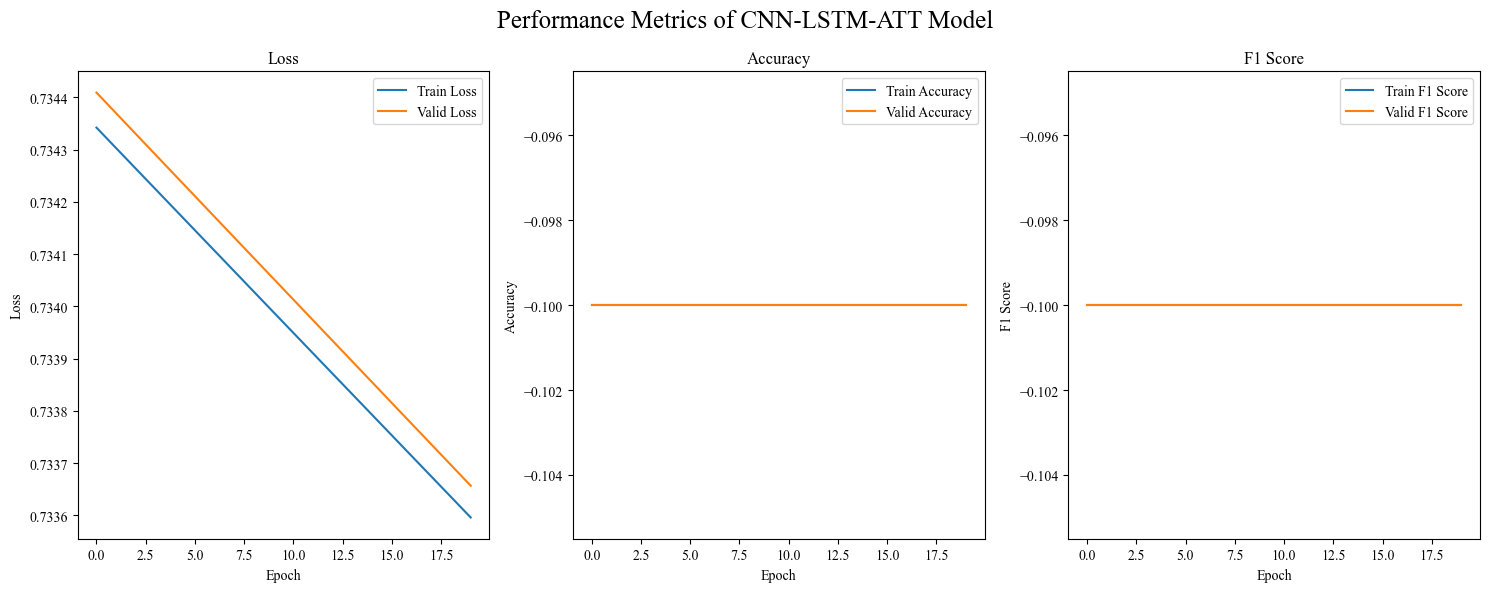

In [77]:
import matplotlib.pyplot as plt

# 创建一个带有3个子图的图
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,6))

# 绘制损失
axes[0].plot(train_losses, label='Train Loss')
axes[0].plot(valid_losses, label='Valid Loss')
axes[0].set_title('Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

# 绘制准确率
axes[1].plot(train_accuracies, label='Train Accuracy')
axes[1].plot(valid_accuracies, label='Valid Accuracy')
axes[1].set_title('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

# 绘制F1分数
axes[2].plot(train_f1, label='Train F1 Score')
axes[2].plot(valid_f1, label='Valid F1 Score')
axes[2].set_title('F1 Score')
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('F1 Score')
axes[2].legend()
plt.suptitle('Performance Metrics of CNN-LSTM-ATT Model', fontsize=18)

# 调整子图布局
plt.tight_layout()
plt.show()

In [78]:
test_preds=[]
test_labels=[]
with torch.no_grad():
    start_time = time.time()  # 记录训练开始时间
    for batch_data, batch_labels in tqdm(test_dataloader):
        inputs = batch_data.to(device)
        labels = batch_labels.to(device).long()
        labels=labels.reshape(-1)
        outputs = model(inputs)
        test_preds.extend(outputs.cpu().detach().numpy())
        test_labels.extend(labels.cpu().detach().numpy())
    end_time = time.time()  # 记录训练结束时间
total_testing_time_ms = (end_time - start_time) * 1000  # 计算总训练时间（毫秒）

100%|██████████| 3/3 [00:00<00:00, 198.00it/s]


In [79]:
test_labels=np.array(test_labels)
test_preds=np.array(test_preds)
test_accuracy = calculate_accuracy(torch.from_numpy(test_labels),torch.from_numpy(test_preds))
test_f1 = calculate_f1_score(torch.from_numpy(test_labels),torch.from_numpy(test_preds))

In [80]:
test_preds_tensor = torch.from_numpy(test_preds) if isinstance(test_preds, np.ndarray) else test_preds
# 使用 torch.max 获取每一行最大值的索引，dim=1 指定沿着列方向
_, predicted_labels = torch.max(test_preds_tensor, dim=1)
predicted_labels=predicted_labels.numpy()

In [81]:
print(f"测试总时间: {total_testing_time_ms:.4f} ms",)
print(f"测试ACC:{test_accuracy}")
print(f"测试F1:{test_f1}")

测试总时间: 17.1511 ms
测试ACC:0.06493506493506493
测试F1:0.12195121951219512


AUC: 0.5


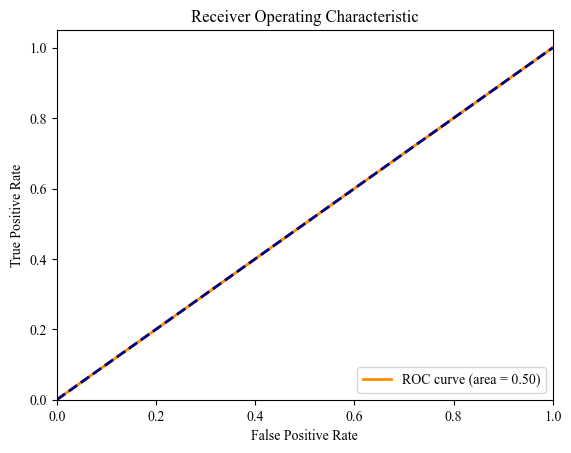

In [82]:
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 计算ROC曲线的各个点
fpr, tpr, thresholds = roc_curve(test_labels, predicted_labels)

# 计算AUC
roc_auc = auc(fpr, tpr)

# 输出AUC
print('AUC:', roc_auc)
# 绘制ROC曲线
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

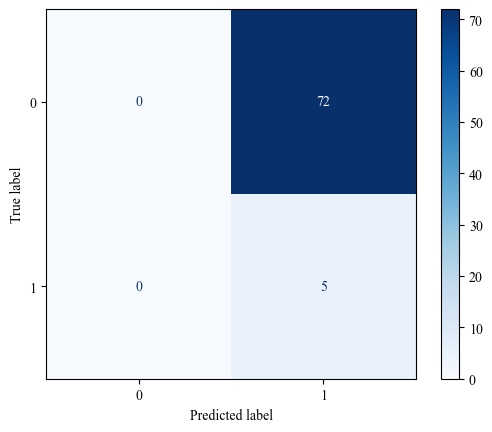

In [83]:
# 计算混淆矩阵
cm = confusion_matrix(test_labels, predicted_labels)

# 显示混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()